In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes-data-set/diabetes.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score , recall_score , f1_score
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r'/kaggle/input/diabetes-data-set/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# Explore Data

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
df.duplicated().sum()

0

# Analysis

In [9]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

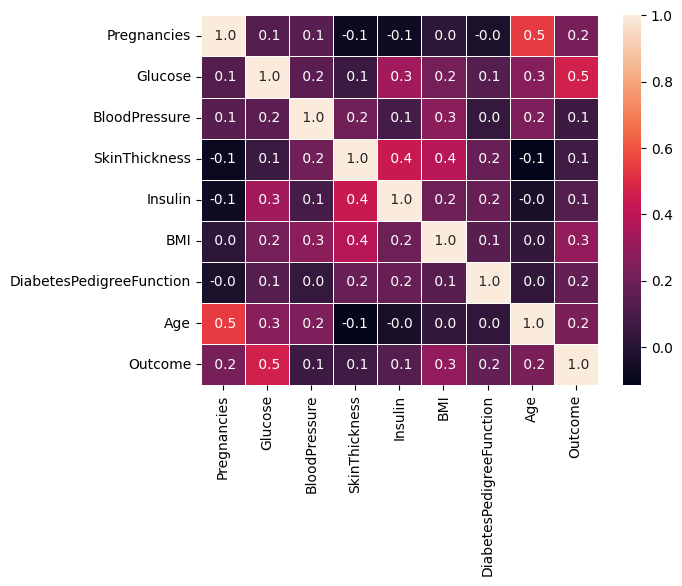

In [10]:
sns.heatmap(df.corr(), annot = True, fmt = ' 0.1f' , linewidth = .5)

<Axes: xlabel='Outcome', ylabel='count'>

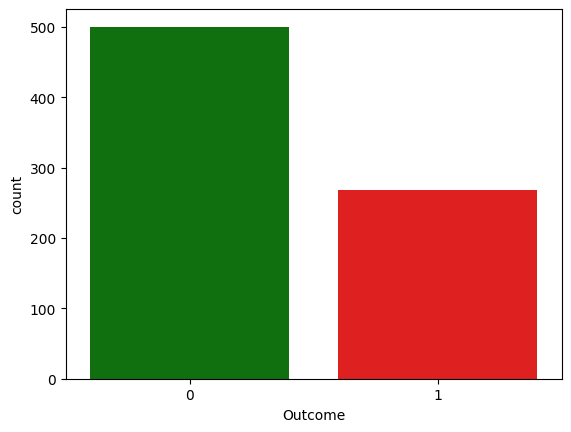

In [11]:
sns.countplot(x = 'Outcome', data = df , palette = ['g','r'])

<Axes: >

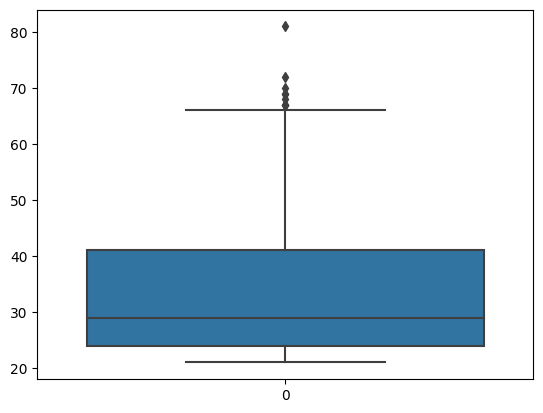

In [12]:
sns.boxplot(df.Age)

# Creat Model

In [13]:
x = df.drop('Outcome', axis = 1)
y = df['Outcome']

In [14]:
x_train , x_test, y_train , y_test = train_test_split(x, y,test_size = .2)

In [15]:
model_1 = LogisticRegression()
model_2 = SVC()
model_3 = GradientBoostingClassifier(n_estimators = 1000)
model_4 = RandomForestClassifier()

In [16]:
columns = ['LogisticRegression','SVC','GradientBoostingClassifier','RandomForestClassifier']
resultOfAccu = []
resultOfRecall = []
resultOfF1 = []

LogisticRegression()
accuracy is: 0.7662337662337663 recall is: 0.5909090909090909 f1 is: 0.5909090909090909


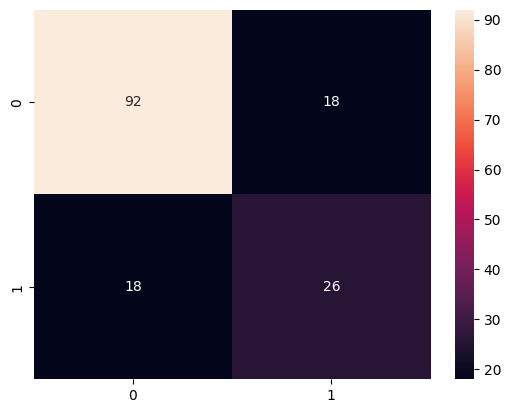

In [17]:
def call(model):
    model.fit(x_train, y_train)
    pre = model.predict(x_test)
    accuracy = accuracy_score(pre , y_test)
    recall = recall_score(pre , y_test)
    f1 = f1_score(pre,y_test)
    
    resultOfAccu.append(accuracy)
    resultOfRecall.append(recall)
    resultOfF1.append(f1)
    
    sns.heatmap(confusion_matrix(pre,y_test),annot = True)
    print(model)
    print('accuracy is:', accuracy, 'recall is:', recall , 'f1 is:', f1)
call(model_1)

SVC()
accuracy is: 0.7337662337662337 recall is: 0.5405405405405406 f1 is: 0.49382716049382713


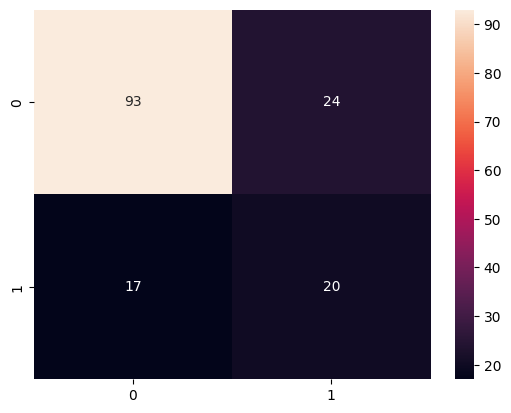

In [18]:
call(model_2)

GradientBoostingClassifier(n_estimators=1000)
accuracy is: 0.7272727272727273 recall is: 0.5178571428571429 f1 is: 0.5800000000000001


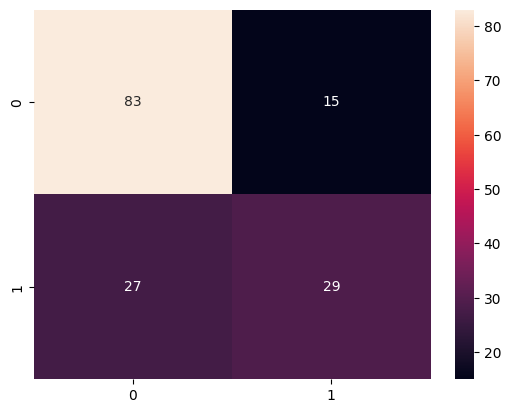

In [19]:
call(model_3)

RandomForestClassifier()
accuracy is: 0.7337662337662337 recall is: 0.5294117647058824 f1 is: 0.5684210526315789


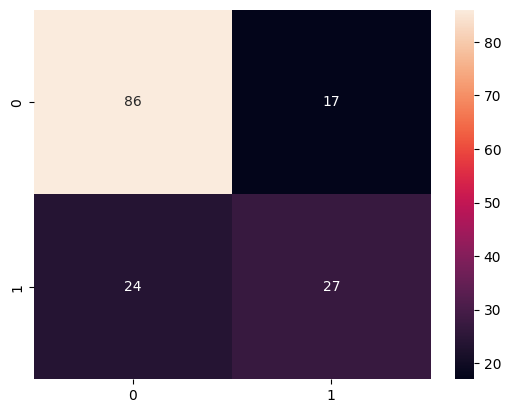

In [20]:
call(model_4)

In [21]:
resultOfAccu

[0.7662337662337663,
 0.7337662337662337,
 0.7272727272727273,
 0.7337662337662337]

In [22]:
resultOfRecall

[0.5909090909090909,
 0.5405405405405406,
 0.5178571428571429,
 0.5294117647058824]

In [23]:
resultOfF1

[0.5909090909090909,
 0.49382716049382713,
 0.5800000000000001,
 0.5684210526315789]

In [24]:
df = pd.DataFrame({'Algorithms':columns,'Accuracies': resultOfAccu,'Recall':resultOfRecall,'F1':resultOfF1})
df

,Algorithms,Accuracies,Recall,F1
0,LogisticRegression,0.766234,0.590909,0.590909
1,SVC,0.733766,0.540541,0.493827
2,GradientBoostingClassifier,0.727273,0.517857,0.580000
3,RandomForestClassifier,0.733766,0.529412,0.568421


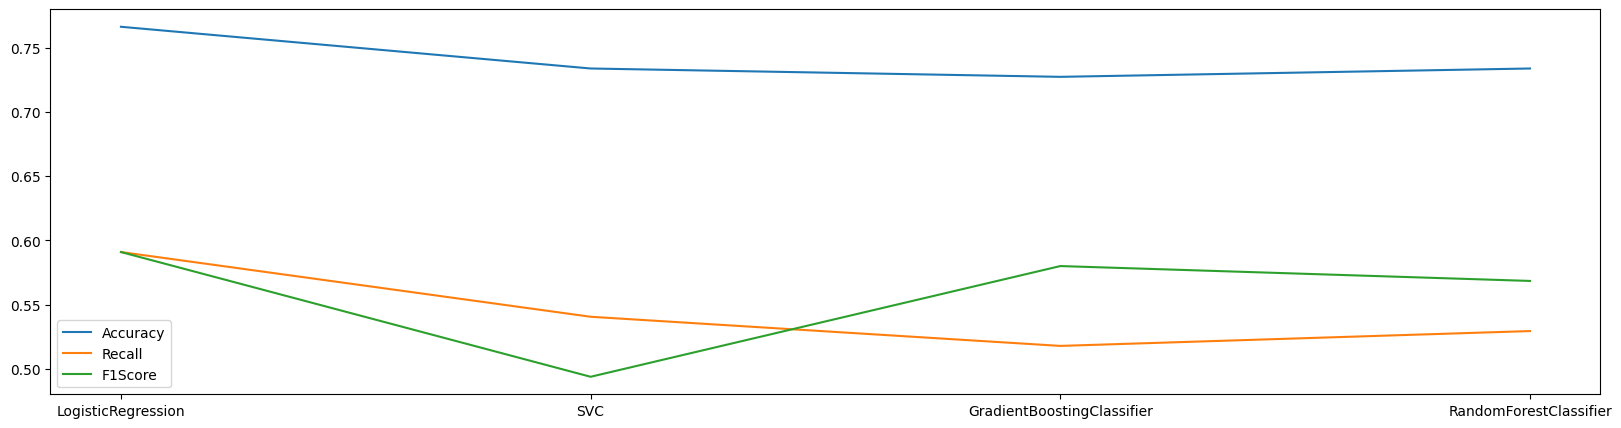

In [25]:
fig,ax = plt.subplots(figsize=(20,5))
plt.plot(df.Algorithms,resultOfAccu, label = 'Accuracy')
plt.plot(df.Algorithms,resultOfRecall, label = 'Recall')
plt.plot(df.Algorithms,resultOfF1,label = 'F1Score')
plt.legend()
plt.show()